In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
test_data = pd.read_csv("../../data/test.csv",delimiter=";", decimal=",")
test_data.head(10).append(test_data.tail(10))

,Index,Val_1,Val_2,Val_3
0,1,26.950,10.771,22.770
1,2,46.662,10.195,22.660
2,3,30.470,12.611,13.530
3,4,24.794,14.682,18.249
4,5,35.849,14.277,23.727
5,6,42.119,10.278,32.340
6,7,48.004,12.426,28.391
7,8,39.413,12.568,30.624
8,9,26.873,14.962,19.613
9,10,22.352,14.336,17.204


In [3]:
val_1_data = test_data["Val_1"]
val_2_data = test_data["Val_2"]
val_3_data = test_data["Val_3"]

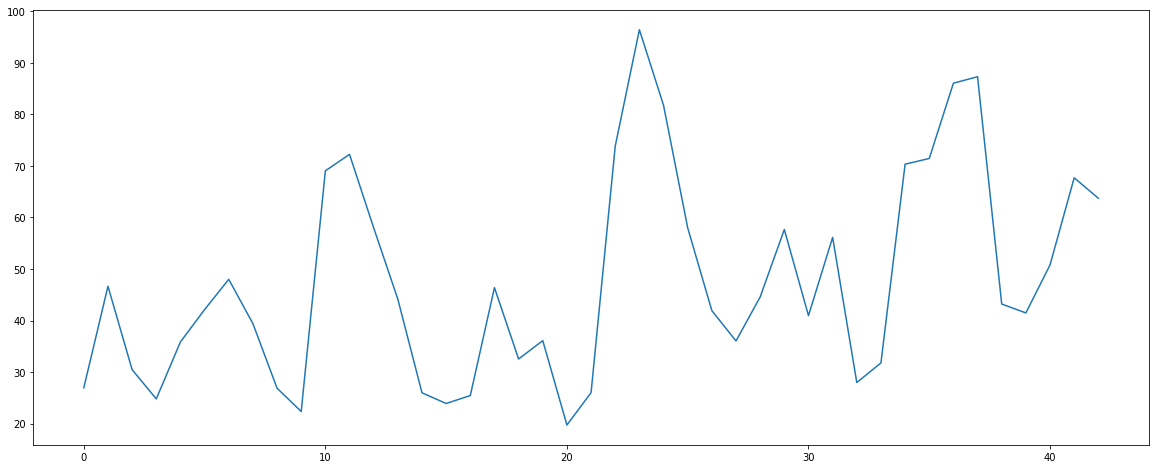

In [4]:
val_1_data.plot(figsize=(20,8))
plt.show()

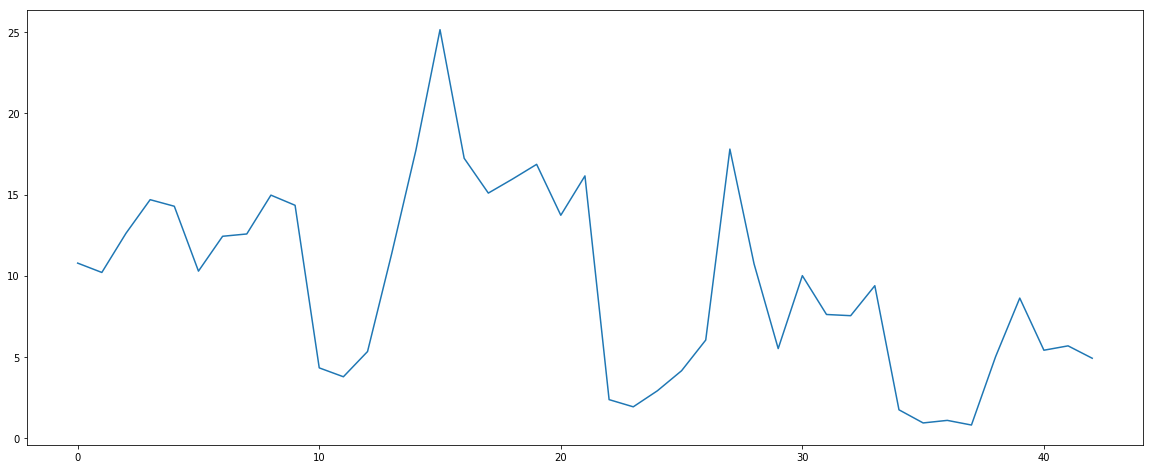

In [5]:
val_2_data.plot(figsize=(20,8))
plt.show()

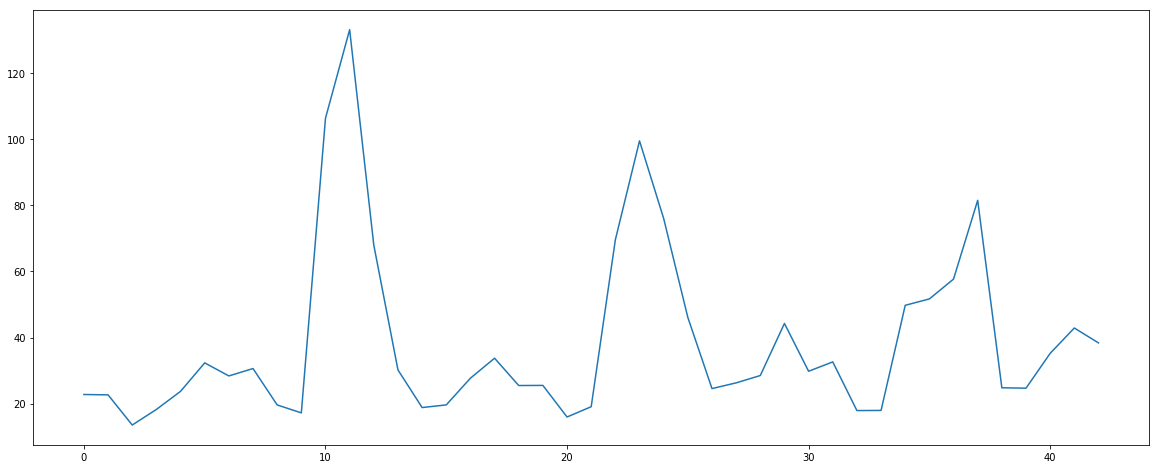

In [6]:
val_3_data.plot(figsize=(20,8))
plt.show()

Length of dataset: 43


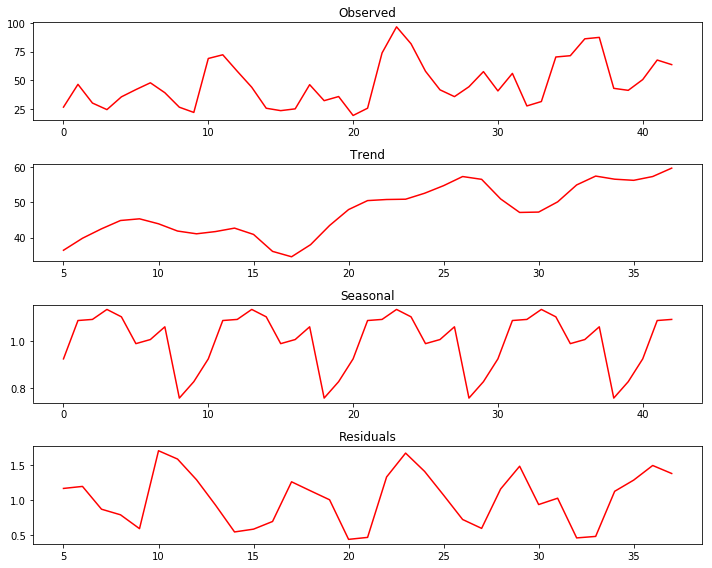

In [16]:
print("Length of dataset: %d" % len(val_1_data))
result = seasonal_decompose(val_1_data, model="multiplicative", freq=10)

fig, ax = plt.subplots(4,1,figsize=(10,8))
ax[0].plot(result.observed,color="red")
ax[0].set_title("Observed")
ax[1].plot(result.trend,color="red")
ax[1].set_title("Trend")
ax[2].plot(result.seasonal,color="red")
ax[2].set_title("Seasonal")
ax[3].plot(result.resid,color="red")
ax[3].set_title("Residuals")
fig.tight_layout()
plt.show()

In [18]:
from pyramid.arima import auto_arima

In [30]:
data_percent = 60.0

stepwise_model = auto_arima(val_1_data[:int(len(val_1_data)*data_percent/100)], 
                            start_p=1, 
                            start_q=1, 
                            start_d=1, 
                            max_p=20, 
                            max_q=20, 
                            max_d=20,
                            trace=True,
                            seasonal=False,
                            error_action='ignore', 
                            suppress_warnings=True, 
                            stepwise=False,
                            n_jobs=1)

print(stepwise_model)

Fit ARIMA: order=(1, 0, 1); AIC=216.182, BIC=221.057, Fit time=0.049 seconds
Fit ARIMA: order=(1, 0, 2); AIC=215.781, BIC=221.875, Fit time=0.128 seconds
Fit ARIMA: order=(1, 0, 3); AIC=214.836, BIC=222.150, Fit time=0.172 seconds
Fit ARIMA: order=(1, 0, 4); AIC=214.370, BIC=222.902, Fit time=0.269 seconds
Fit ARIMA: order=(1, 0, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 6); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 7); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 8); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 1); AIC=215.425, BIC=221.520, Fit time=0.067 seconds
Fit ARIMA: order=(2, 0, 2); AIC=216.986, BIC=224.299, Fit time=0.083 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 4); AIC=214.548, BIC=224.299, Fit time=0.198 seconds
Fit ARIMA: order=(2, 0, 5); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 0, 6); AIC=nan, BIC=nan, Fit time=nan 